In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [30]:
import io

df = pd.read_csv(io.BytesIO(uploaded['organised_Gen.csv']))
df.head(10)

,Unnamed: 0,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
1,1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
3,3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,4,2001,1,AK,Total Electric Power Industry,Wind,87.0
5,5,2001,1,AK,Total Electric Power Industry,Total,590145.0
6,6,2001,1,AK,"Electric Generators, Electric Utilities",Coal,18410.0
7,7,2001,1,AK,"Electric Generators, Electric Utilities",Petroleum,64883.0
8,8,2001,1,AK,"Electric Generators, Electric Utilities",Natural Gas,305277.0
9,9,2001,1,AK,"Electric Generators, Electric Utilities",Hydroelectric Conventional,104549.0


In [16]:
df['TYPE OF PRODUCER'].unique()

array(['Total Electric Power Industry',
       'Electric Generators, Electric Utilities',
       'Combined Heat and Power, Electric Power',
       'Combined Heat and Power, Commercial Power',
       'Combined Heat and Power, Industrial Power',
       'Electric Generators, Independent Power Producers'], dtype=object)

In [17]:
sources = list(df['ENERGY SOURCE'].unique())
print(sources)

['Coal', 'Petroleum', 'Natural Gas', 'Hydroelectric Conventional', 'Wind', 'Total', 'Other Gases', 'Nuclear', 'Wood and Wood Derived Fuels', 'Other Biomass', 'Other', 'Solar Thermal and Photovoltaic', 'Pumped Storage', 'Geothermal']


In [1]:
for source in sources:
  df.loc[df['ENERGY SOURCE'] == source, [source]] = df['GENERATION (Megawatthours']

df = df.fillna(0)
df.head()

NameError: name 'sources' is not defined

In [46]:
grouped_df = df.groupby(['TYPE OF PRODUCER'])[sources].sum()
grouped_df.head(6)

,Coal,Petroleum,Natural Gas,Hydroelectric Conventional,Wind,Total,Other Gases,Nuclear,Wood and Wood Derived Fuels,Other Biomass,Other,Solar Thermal and Photovoltaic,Pumped Storage,Geothermal
TYPE OF PRODUCER,,,,,,,,,,,,,,
"Combined Heat and Power, Commercial Power",3948.0,9281.0,9864.0,2228.0,1840.0,11160.0,419.0,0.0,2052.0,6639.0,3575.0,2660.0,178.0,84.0
"Combined Heat and Power, Electric Power",5377.0,7177.0,8741.0,156.0,0.0,10253.0,2850.0,0.0,3653.0,5544.0,3370.0,190.0,0.0,48.0
"Combined Heat and Power, Industrial Power",9112.0,10938.0,11896.0,3635.0,934.0,12482.0,5240.0,0.0,7763.0,7290.0,7309.0,1205.0,0.0,0.0
"Electric Generators, Electric Utilities",10262.0,13041.0,12209.0,11115.0,5473.0,13095.0,1315.0,5226.0,3296.0,5328.0,4562.0,3921.0,4105.0,844.0
"Electric Generators, Independent Power Producers",6269.0,9381.0,10975.0,9120.0,8247.0,13002.0,1358.0,3452.0,4201.0,9311.0,6051.0,5465.0,1028.0,1579.0
Total Electric Power Industry,12674.0,13358.0,12999.0,12588.0,8927.0,13364.0,7030.0,8076.0,9559.0,12036.0,11374.0,5952.0,4828.0,1687.0


In [47]:
grouped_df.columns

Index(['Coal', 'Petroleum', 'Natural Gas', 'Hydroelectric Conventional',
       'Wind', 'Total', 'Other Gases', 'Nuclear',
       'Wood and Wood Derived Fuels', 'Other Biomass', 'Other',
       'Solar Thermal and Photovoltaic', 'Pumped Storage', 'Geothermal'],
      dtype='object')

Text(0.5, 1.0, 'Types of Energy Sources by Producer')

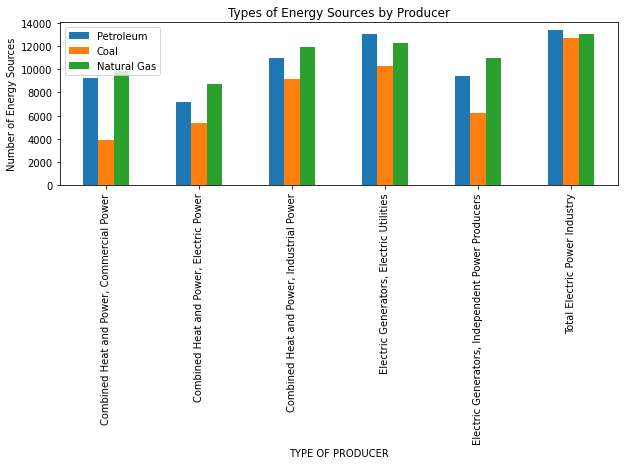

In [78]:
# grouped_df.plot.bar()
ax = grouped_df.loc[:, ['Petroleum', 'Coal', 'Natural Gas']].plot.bar(rot=90)
ax.set_ylabel("Number of Energy Sources")
ax.set_title("Types of Energy Sources by Producer")